# Movie Dataset Project

# B. Alkassab "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

## Project Description 

- Use of the business analytics techniques learned this semester to analyse the IMDB movie data set.


- Identify which factors mostly influences success of a movie in regards to IMDB scores

## Project Table of contents


- Installation of Rise to provide the capability to use the jupyer notebook slides 


- Initial data understanding & importation of needed libraries 


- Data preperation & cleaning


- Data analyzation & visualisation 


- Data correlation analysis 


- Initial Findings section 


- Regression analysis section 


- Classification analysis section


- Clustering analysis section


- Final findings section 

## Rise Installation

In [11]:
pip install RISE

Note: you may need to restart the kernel to use updated packages.


# Part One

# Data understanding

- import needed libraries
- preliminary correlation analysis
- Identify data quality issues
- Identifying value counts of a select list of columns which is important to help predict a movie's success
- Identify main takeaways from this part and goal of project

## To start, I will import needed libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

#regression
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#Model selection/Train/Test Split
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 


#f_regression 
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

In [2]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.000,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.000,English,USA,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000
1,Color,Gore Verbinski,302.000,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.000,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.000,English,USA,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0
2,Color,Sam Mendes,602.000,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.000,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.000,English,UK,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000
3,Color,Christopher Nolan,813.000,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.000,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.000,English,USA,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000
4,NaN,Doug Walker,nan,nan,131.000,nan,Rob Walker,131.000,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.000,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,NaN,NaN,NaN,nan,nan,12.000,7.100,nan,0


# Correlation Analysis 

### This will help in providing initial pointers for this analysis 

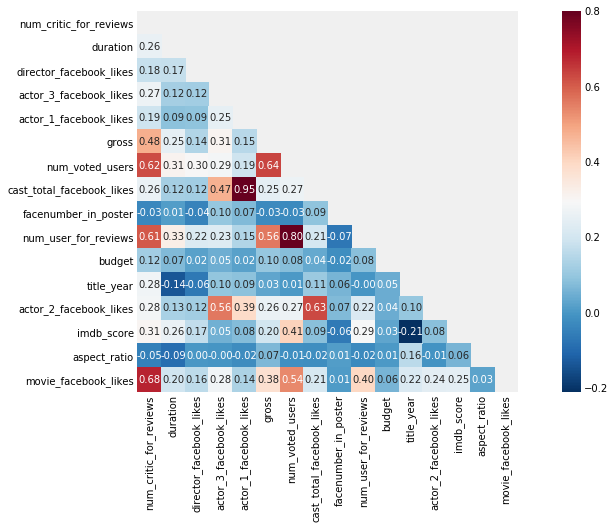

In [79]:

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".2f", cmap='RdBu_r', mask=mask)



In [80]:
df.corr()['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000
num_voted_users              0.411
num_critic_for_reviews       0.305
num_user_for_reviews         0.292
duration                     0.262
movie_facebook_likes         0.247
gross                        0.198
director_facebook_likes      0.171
cast_total_facebook_likes    0.086
actor_2_facebook_likes       0.084
actor_1_facebook_likes       0.076
aspect_ratio                 0.059
actor_3_facebook_likes       0.053
budget                       0.031
facenumber_in_poster        -0.063
title_year                  -0.209
Name: imdb_score, dtype: float64

## The goal of this project is to identify which factors mostly influences success of a movie in regards to IMDB scores. 

- The movie related data that will be gathered in this project can also assist us in predicting the movie's IMDB score.

- Some of the main factors that has to be considered are  Actors in the movie, the director, what the budget for the movie was, how much money it made at the box office, how long the movie is, and what genre the movie is.

- As it appears in the initial correlation analysis above, the top three variables that are correlated with the IMDB score are  "num_voted_users", "num_critic_for_reviews", and "num_users_for_reviews".

# Data Understanding

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

## Identify data quality issues

In [82]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [83]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000,5028.000,4939.000,5020.000,5036.000,4159.000,5043.000,5043.000,5030.000,5022.000,4551.000,4935.000,5030.000,5043.000,4714.000,5043.000
mean,140.194,107.201,686.509,645.010,6560.047,48468407.527,83668.161,9699.064,1.371,272.771,39752620.436,2002.471,1651.754,6.442,2.220,7525.965
std,121.602,25.197,2813.329,1665.042,15020.759,68452990.439,138485.257,18163.799,2.014,377.983,206114898.449,12.475,4042.439,1.125,1.385,19320.445
min,1.000,7.000,0.000,0.000,0.000,162.000,5.000,0.000,0.000,1.000,218.000,1916.000,0.000,1.600,1.180,0.000
25%,50.000,93.000,7.000,133.000,614.000,5340987.500,8593.500,1411.000,0.000,65.000,6000000.000,1999.000,281.000,5.800,1.850,0.000
50%,110.000,103.000,49.000,371.500,988.000,25517500.000,34359.000,3090.000,1.000,156.000,20000000.000,2005.000,595.000,6.600,2.350,166.000
75%,195.000,118.000,194.500,636.000,11000.000,62309437.500,96309.000,13756.500,2.000,326.000,45000000.000,2011.000,918.000,7.200,2.350,3000.000
max,813.000,511.000,23000.000,23000.000,640000.000,760505847.000,1689764.000,656730.000,43.000,5060.000,12215500000.000,2016.000,137000.000,9.500,16.000,349000.000


## Identifying value counts of a select list of columns which is important to help predict a movie's success

In [84]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [85]:
df['country'].value_counts().head(10)

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Japan          23
Name: country, dtype: int64

In [86]:
df['language'].value_counts().head(10)

English      4704
French         73
Spanish        40
Hindi          28
Mandarin       26
German         19
Japanese       18
Italian        11
Cantonese      11
Russian        11
Name: language, dtype: int64

# Data preparation

## The following are the steps that will be taken to properly prepare the data to be analyzed in the next section:

- Identifying Missing Values
- Identifying what kinds of values exist in the non-numerical data
- Having Identified the missling values in step one, I will fill in those missing values in the data
- Transforming some predictor variables
- If needed, some of the predictor variables will be deleted if shown to be not helpful in the prevoius step
- At this point, I believe that the data is now ready to be properly analyzed. 

## I believe that this is the most important step as the analysis cannot be conducted unless the data is prepared and cleaned properly.

## Missing Values

In [87]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

## Identifying what kinds of values exist in the non-numerical data

In [88]:
df.groupby('genres').size()

genres
Action                                                               11
Action|Adventure                                                     11
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy                1
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller       1
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi                 2
Action|Adventure|Animation|Comedy|Family                              6
Action|Adventure|Animation|Comedy|Family|Fantasy                      4
Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi               2
Action|Adventure|Animation|Comedy|Family|Sci-Fi                       3
Action|Adventure|Animation|Comedy|Fantasy                             1
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi                      1
Action|Adventure|Animation|Comedy|Sci-Fi                              1
Action|Adventure|Animation|Drama|Fantasy|Sci-Fi                       1
Action|Adventure|Animation|Drama|Mystery|Sci-Fi|Thriller 

In [89]:
df['country'].value_counts().head()

USA        3807
UK          448
France      154
Canada      126
Germany      97
Name: country, dtype: int64

In [90]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

## Filling Missing values

In [91]:
df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [92]:
df['color'].replace({'Color':1, " Black and White":0}, inplace=True)

In [93]:
df['color'].fillna(1, inplace=True)

In [94]:
df.groupby('color').size()

color
0.000     209
1.000    4834
dtype: int64

In [95]:
df['color'] = df['color'].astype(int)

In [97]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [98]:
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].mean(), inplace=True)

In [99]:
df['duration'].fillna(df['duration'].mean(), inplace=True)

### Replacing NA with zero ( Not all directors have facebook)

In [100]:
df['director_facebook_likes'].fillna(0, inplace=True)

### Replacing NA with zero ( Not all actors have facebook)

In [101]:
df['actor_3_facebook_likes'].fillna(0, inplace=True)

In [102]:
df['actor_2_facebook_likes'].fillna(0, inplace=True)

In [103]:
df['actor_1_facebook_likes'].fillna(0, inplace=True)

In [104]:
df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].mean(), inplace=True)

In [105]:
df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].mean(), inplace=True)

In [106]:
df['aspect_ratio'].fillna(df['aspect_ratio'].mean(), inplace=True)

### Movies with no rating will now have "NR" 

In [107]:
df['content_rating'].fillna('NR', inplace=True)

### In terms of language, NA will now be replaced with English

In [110]:
df['language'].fillna('English', inplace=True)

### In terms of Country, NA will now be replaced with USA

In [112]:
df['country'].fillna('USA', inplace=True)

In [113]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
NR            303
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

### The number of ratings will now be consolidated 

In [114]:
df['content_rating'].replace({'Unrated': 'NR', 'Not Rated':'NR', 'Approved':'NR', 'Passed':'NR', 'GP':'G', 'M':'R', 'TV-Y7':'G','TV-Y':'G', 'X':'R', 'TV-14': 'PG-13', 'TV-MA': 'R', 'TV-PG':'PG', 'TV-G':'G', 'NC-17':'R'}, inplace=True)

In [115]:
df['content_rating'].value_counts()

R        2163
PG-13    1491
PG        714
NR        545
G         130
Name: content_rating, dtype: int64

### To simplify the data, the each movie will now have only one movie genre

In [116]:
df['genres'] = df['genres'].str.strip()
df['genres'].head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
4                        Documentary
Name: genres, dtype: object

In [117]:
df['genres'] = df['genres'].str.replace('|', " ")
df.genres.head()

0    Action Adventure Fantasy Sci-Fi
1           Action Adventure Fantasy
2          Action Adventure Thriller
3                    Action Thriller
4                        Documentary
Name: genres, dtype: object

In [118]:
df['genres'] = df['genres'].str.split()
df.genres.head()

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
4                           [Documentary]
Name: genres, dtype: object

In [119]:
df['genres'] = df['genres'].map(lambda x: x[0])

In [120]:
df['genres'].head()

0         Action
1         Action
2         Action
3         Action
4    Documentary
Name: genres, dtype: object

In [121]:
df['genres'].value_counts()

Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
History           1
Film-Noir         1
Music             1
Game-Show         1
Name: genres, dtype: int64

In [122]:
df['genres'].isnull().sum()

0

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5043 non-null int32
director_name                4939 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-n

### Deleting unimportant predictors

In [124]:
df.dropna(inplace=True)

In [125]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

# Business Intelligence

- Average IMDB Score by Movie Genre

- Average IMDB Movie Scores by Country

- Relationship between the average duration of a movie and its IMDB Score

- Relationship between the average number of users that voted for a movie by its IMDB Score Category

- Relationship between the total number of users that voted for a movie and its IMDB Score

- Relationship between the Average number of Director Facebook Likes and its IMDB Score

- Relationship between the Average number of Critical Reviews a movie received and its IMDB Score

- Relationship between the Movie's Language and its IMDB Score

- Relationship between the Average Number of Facebook Likes a Movie has and its IMDB Score

- Relationship between the Average Budget a movie had and its IMDB Score

- Relationship between the Average Gross Revenue a movie had and its IMDB Score

- Relationship between the Average IMDB Score by Movie Content Rating Category

## Average IMDB Score by Movie Genre

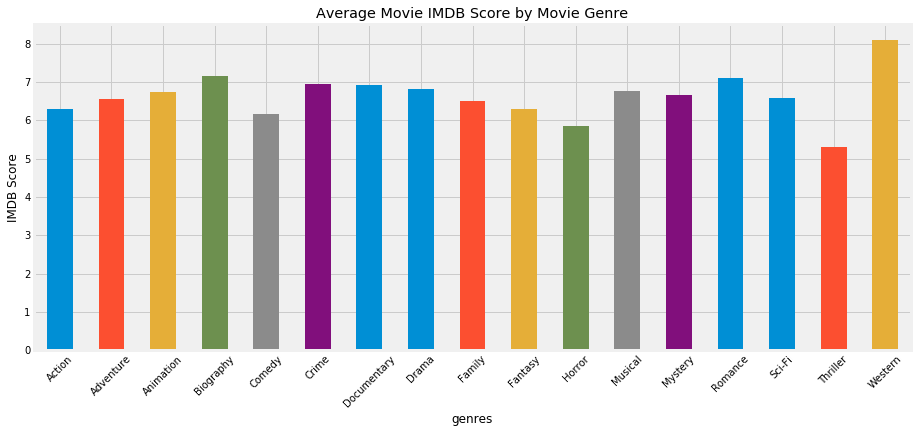

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[14,6])
plt.title('Average Movie IMDB Score by Movie Genre')
plt.xlabel('Genre')
plt.ylabel('IMDB Score')
df.groupby('genres')['imdb_score'].mean().plot(kind='bar', rot=45)

## Average IMDB Movie Scores by Country

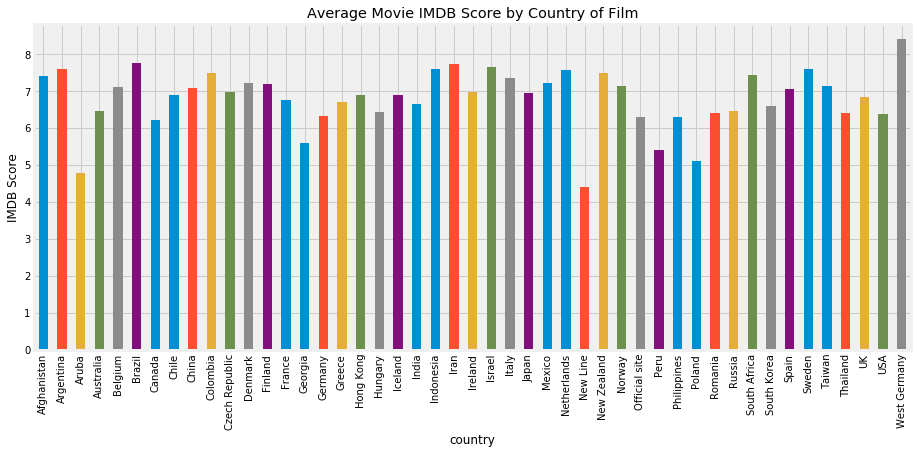

In [53]:
plt.figure(figsize=[14,6])
plt.title('Average Movie IMDB Score by Country of Film') 
plt.xlabel('Country')
plt.ylabel('IMDB Score')
df.groupby('country')['imdb_score'].mean().plot(kind='bar')

## Relationship between the average duration of a movie and its IMDB Score

Text(0,0.5,'imdb_score')

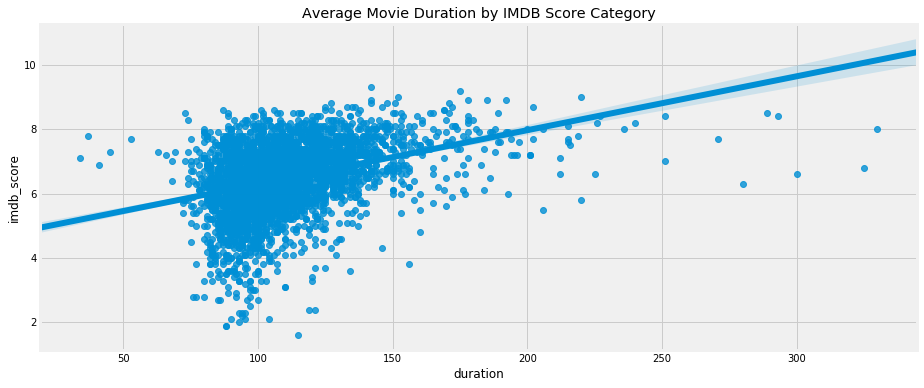

In [54]:
plt.figure(figsize=[14,6])
plt.title('Average Movie Duration by IMDB Score Category')
sns.regplot(x="duration",y="imdb_score",data=df)
plt.xlabel("duration")
plt.ylabel('imdb_score') 

## Relationship between the average number of users that voted for a movie by its IMDB Score Category

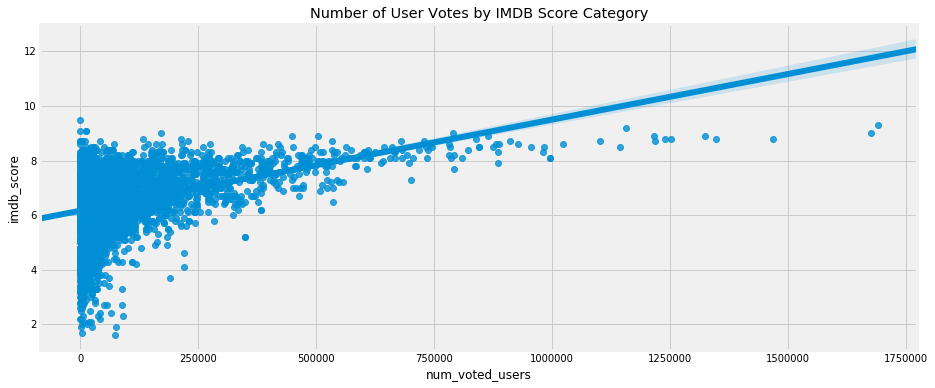

In [49]:
plt.figure(figsize=[14,6])
plt.ylabel('User Votes')
plt.title('Number of User Votes by IMDB Score Category')
sns.regplot(x="num_voted_users",y="imdb_score",data=df)

## Relationship between the total number of users that voted for a movie and its IMDB Score

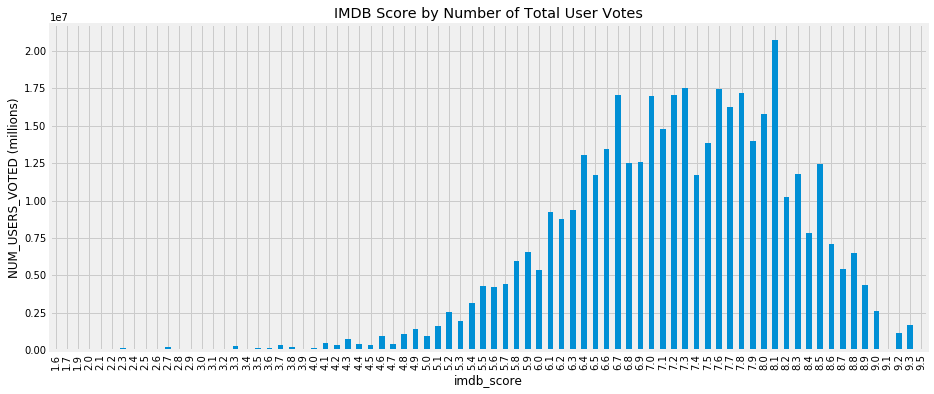

In [50]:
plt.figure(figsize=[14,6])
plt.xlabel('IMDB_SCORE')
plt.ylabel('NUM_USERS_VOTED (millions)')
plt.title('IMDB Score by Number of Total User Votes')
df.groupby('imdb_score')['num_voted_users'].sum().plot(kind='bar')

## Relationship between the Average number of Director Facebook Likes and its IMDB Score

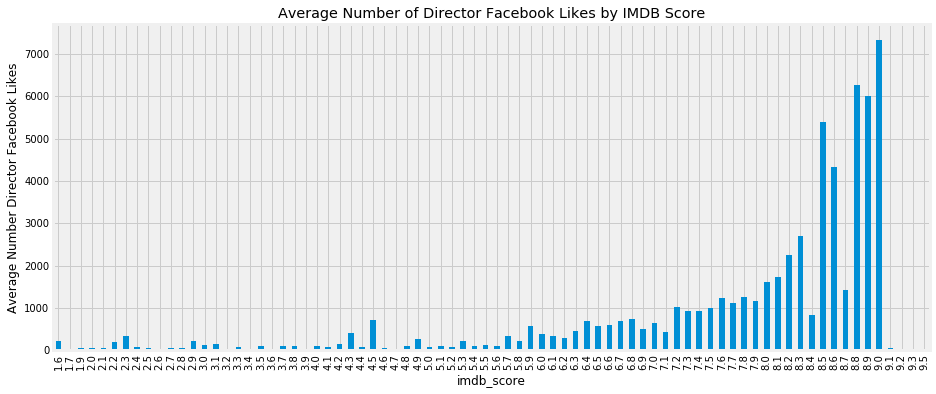

In [51]:
plt.figure(figsize=[14,6])
plt.title('Average Number of Director Facebook Likes by IMDB Score')
plt.ylabel('Average Number Director Facebook Likes')
df.groupby('imdb_score')['director_facebook_likes'].mean().plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


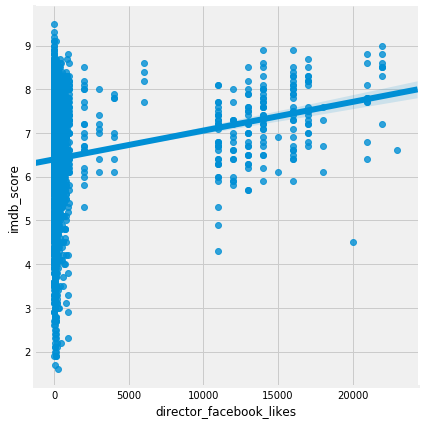

In [52]:
sns.lmplot('director_facebook_likes', 'imdb_score', df, size=6)

## Relationship between the Average number of Critical Reviews a movie received and its IMDB Score

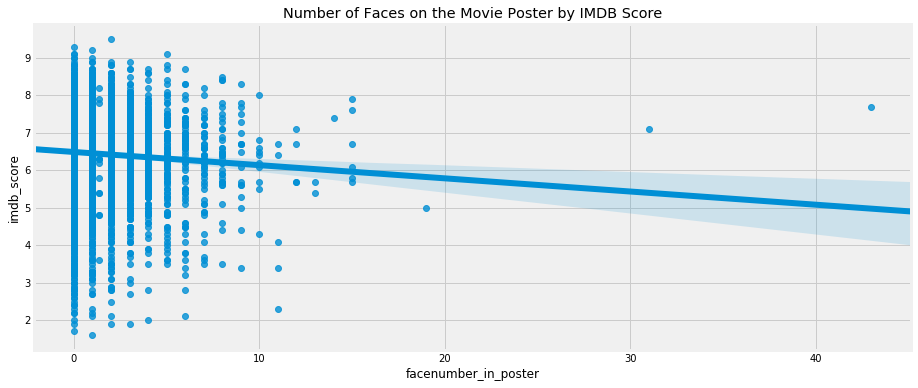

In [53]:

plt.figure(figsize=[14,6])
plt.ylabel('Number of Faces on the Movie Poster')
plt.title('Number of Faces on the Movie Poster by IMDB Score')
sns.regplot(x="facenumber_in_poster",y="imdb_score",data=df)

##  Relationship between the Movie's Language and its IMDB Score

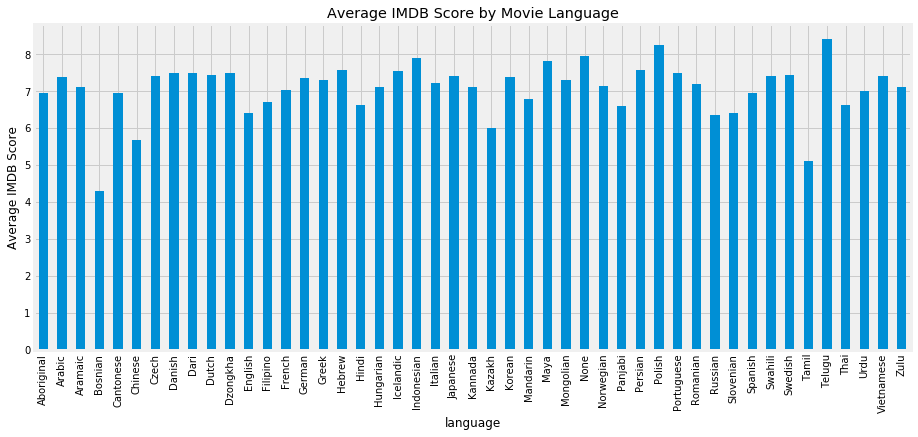

In [54]:
plt.figure(figsize=[14,6])
plt.title('Average IMDB Score by Movie Language')
plt.ylabel('Average IMDB Score')
df.groupby('language')['imdb_score'].mean().plot(kind='bar')

## On Avg, there seem to be little to no impact that language has on IMDB scores

## Relationship between the Average Number of Facebook Likes a Movie has and its IMDB Score

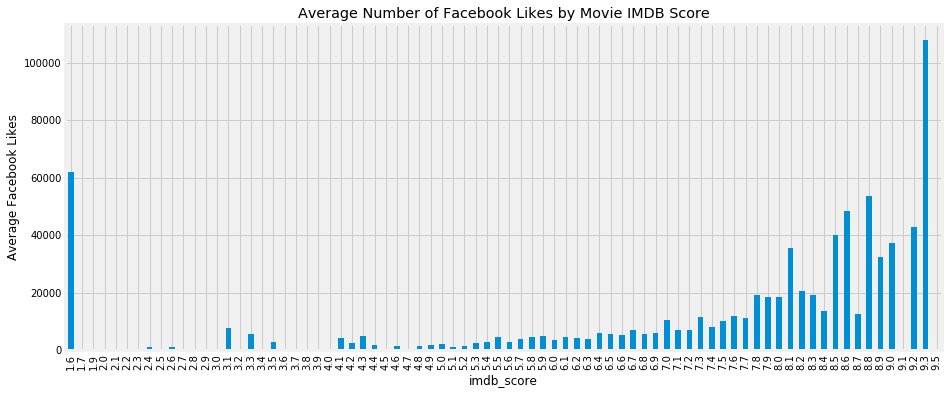

In [55]:
plt.figure(figsize=[14,6])
plt.title('Average Number of Facebook Likes by Movie IMDB Score')
plt.ylabel('Average Facebook Likes')
df.groupby('imdb_score')['movie_facebook_likes'].mean().plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


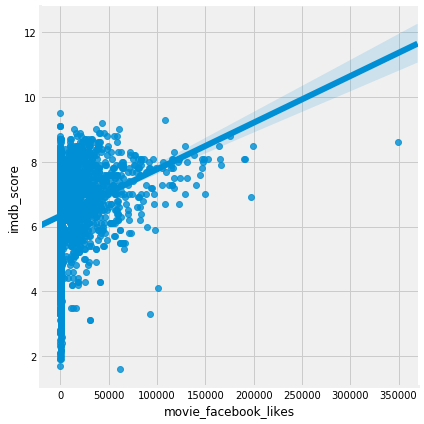

In [56]:
sns.lmplot('movie_facebook_likes', 'imdb_score', df, size=6)

## Relationship between the Average Budget a movie had and its IMDB Score

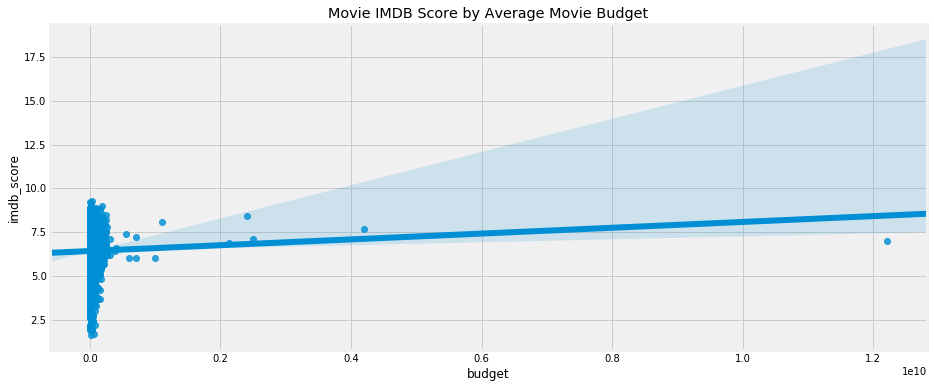

In [57]:
plt.figure(figsize=[14,6])
plt.ylabel('Average Movie Budget (tens of millions)')
plt.title('Movie IMDB Score by Average Movie Budget')
sns.regplot(x="budget",y="imdb_score",data=df)

## Relationship between the Average Gross Revenue a movie had and its IMDB Score

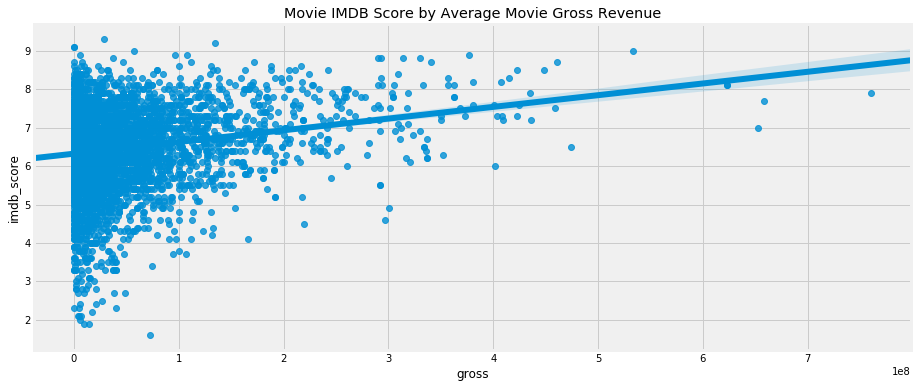

In [58]:
plt.figure(figsize=[14,6])
plt.ylabel('Movie Gross Revenue (tens of millions)')
plt.title('Movie IMDB Score by Average Movie Gross Revenue')
sns.regplot(x="gross",y="imdb_score",data=df)

## Relationship between the Average IMDB Score by Movie Content Rating Category

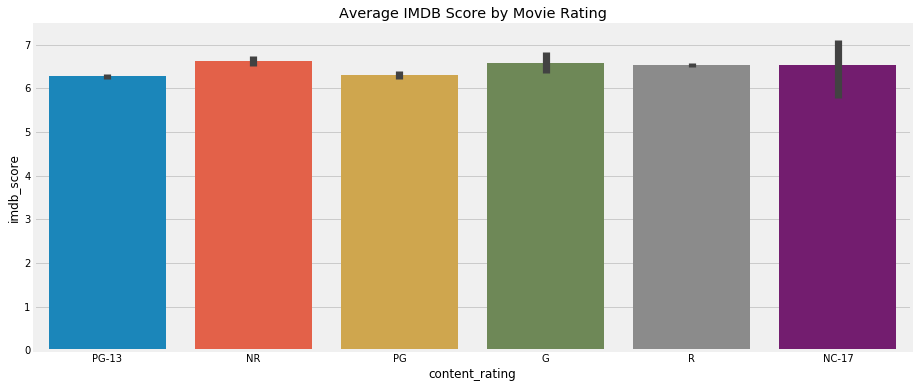

In [59]:
plt.figure(figsize=[14,6])
plt.ylabel('Average IMDB Score')
plt.title('Average IMDB Score by Movie Rating')
sns.barplot(x="content_rating",y="imdb_score",data=df)

# Final Correlation Analysis

## Now that the relationships between different variables has been visualized in the prevoius section, it is time to conduct the correlation Analysis which will reflect the extent of correlation between the variables and IMDB scores. 

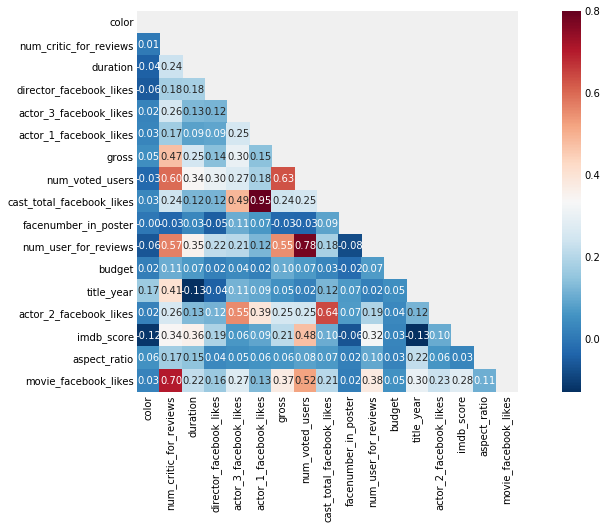

In [55]:
corr = df.corr()

# Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".2f", cmap='RdBu_r', mask=mask)

The correlation matrixabove reflects that the top three variables that are most correlated with the IMDB Score are:
- Num_Voted_Users (r value of 0.41)
- Num_critic_for_reviews (r value of 0.30)
- Num_users_for_reviews (r value of 0.29)

### Now that the top three variables which are mostly correlated with IMDB scores are identified, the variables most correlated with them will be shown below. 

 1. Top three correlated variables with Num_Voted_Users are:
- Num_users_for_reviews (r value of 0.8) (Strong + positive correlation)
- Gross Revenue (r value of 0.64)
- Num_critic_for_reviews (r value of 0.62)
 2. Top three correlated variables with Num_critic_for_reviews are:
- Movie facebook likes (r value of 0.68)
- Num_voted_users (r value of 0.62)
- Num_users_for_reviews (r value of 0.61)
 3. Top three correlated variables with Num_users_for_reviews are:
- Num_voted_users (r value of 0.8)
- Num_critic_for_review (r value of 0.61)
- Gross Revenue (r value of 0.56)

# Part One Finding Summary

### The most important factor that effects the IMDB score is the number of voted users
- The higher the number of poeple that vote, the higher the actual movie score is.
- The strengh of this correlation starts to weaken once the movie reaches a score of 8.5

### The second most importnat factor that effects the IMDB score is the role of critic's reviews
- As the number of critic reviews increase, the score of the movies also increase.
- This was reflected in the positive correlation between the number of thier reviews and the IMDB scores
- Basically, this shows that movies that had more exposure to critics and thier critical reviews had higher scores than movies who had less

### The third most important factor that effects IMDB score is the number of user reviews
- As the number of user reviews increase, the IMDB score increase 
- Basically, there is a posiive realtionship between number of user reviews and IMBD score. 

### Facebook likes & Movie duration has shown to be a greatly significant indicator of IMDB scores
- There appears to be a postive relationship between facebook likes & Movie duration and the IMDB scores
- While this correlation is not as strong as the top three mentioned above, it can be said that they serve as a good indicator of IMDB scores.

### While not as significant as the others mentioned, Gross Revenue also serves a good indicator on IMDB scores.
- This is said because there seems to be a positive correlation between Gross Revenue and IMDB Scores.
- This is simply because higher Gross revenue indicated that many people went to watched the movie, which in turn indicates that poeple must have liked it.

### Some less significant factors that serve as an indicator for IMDB scores are:
- Director popularity ( Movies with Directors that had higher facebook likes had higher IMDB scores than directors with lower likes)
- Movie duration, country of origin, and Genre had limited impact

### Three of the variables that seem to not create no real impact on IMDB score:
- Average Budget
- Content Rating
- Language 

## Suggestions & Comments 

 - This project was very useful as it allowed us to apply the things we learned at labs in a more relatable way.
 - If anything, I would suggest that the instructions of the project be expanded in a way that would give more clarity on the requirments especially for the students with no prior experience in data analysis (I heard this comment from multiple students)
 - One final suggestion would be that maybe in the future, instead of choosing the dataset to be analyzed, you would let every student choose his/her own dataset. I believe that this will make the project much more intresting to students as they will choose to analyze data that peaks there interest which in turn will make them excel and expand in thier work.

# B. Alkassab "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Part Two 

## Regression Analysis

- drop unuseful columns

- Regression Module Testing 

- Neural Network Regression

- Decision Tree

- Random Forest Regression

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 28 columns):
color                        3851 non-null int32
director_name                3851 non-null object
num_critic_for_reviews       3851 non-null float64
duration                     3851 non-null float64
director_facebook_likes      3851 non-null float64
actor_3_facebook_likes       3851 non-null float64
actor_2_name                 3851 non-null object
actor_1_facebook_likes       3851 non-null float64
gross                        3851 non-null float64
genres                       3851 non-null object
actor_1_name                 3851 non-null object
movie_title                  3851 non-null object
num_voted_users              3851 non-null int64
cast_total_facebook_likes    3851 non-null int64
actor_3_name                 3851 non-null object
facenumber_in_poster         3851 non-null float64
plot_keywords                3851 non-null object
movie_imdb_link              3851 non-n

### droping unuseful columns 

In [128]:
df = df.drop(['director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link',
              'language','country','color'], axis=1).copy()

df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.000,178.000,0.000,855.000,1000.000,760505847.000,Action,886204,4834,0.000,3054.000,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000
1,302.000,169.000,563.000,1000.000,40000.000,309404152.000,Action,471220,48350,0.000,1238.000,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0
2,602.000,148.000,0.000,161.000,11000.000,200074175.000,Action,275868,11700,1.000,994.000,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000
3,813.000,164.000,22000.000,23000.000,27000.000,448130642.000,Action,1144337,106759,0.000,2701.000,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000
5,462.000,132.000,475.000,530.000,640.000,73058679.000,Action,212204,1873,1.000,738.000,PG-13,263700000.000,2012.000,632.000,6.600,2.350,24000


In [129]:
df = pd.get_dummies(df,columns=['content_rating','genres'],prefix=['rating','genre'])
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_G,rating_NR,rating_PG,rating_PG-13,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_Western
0,723.000,178.000,0.000,855.000,1000.000,760505847.000,886204,4834,0.000,3054.000,237000000.000,2009.000,936.000,7.900,1.780,33000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,302.000,169.000,563.000,1000.000,40000.000,309404152.000,471220,48350,0.000,1238.000,300000000.000,2007.000,5000.000,7.100,2.350,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,602.000,148.000,0.000,161.000,11000.000,200074175.000,275868,11700,1.000,994.000,245000000.000,2015.000,393.000,6.800,2.350,85000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,813.000,164.000,22000.000,23000.000,27000.000,448130642.000,1144337,106759,0.000,2701.000,250000000.000,2012.000,23000.000,8.500,2.350,164000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,462.000,132.000,475.000,530.000,640.000,73058679.000,212204,1873,1.000,738.000,263700000.000,2012.000,632.000,6.600,2.350,24000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
df.rename(columns={'rating_PG-13': 'rating_PG13'},inplace=True)
df.rename(columns={'genre_Sci-Fi':'genre_SciFi'},inplace=True)
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_G,rating_NR,rating_PG,rating_PG13,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_SciFi,genre_Thriller,genre_Western
0,723.000,178.000,0.000,855.000,1000.000,760505847.000,886204,4834,0.000,3054.000,237000000.000,2009.000,936.000,7.900,1.780,33000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,302.000,169.000,563.000,1000.000,40000.000,309404152.000,471220,48350,0.000,1238.000,300000000.000,2007.000,5000.000,7.100,2.350,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,602.000,148.000,0.000,161.000,11000.000,200074175.000,275868,11700,1.000,994.000,245000000.000,2015.000,393.000,6.800,2.350,85000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,813.000,164.000,22000.000,23000.000,27000.000,448130642.000,1144337,106759,0.000,2701.000,250000000.000,2012.000,23000.000,8.500,2.350,164000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,462.000,132.000,475.000,530.000,640.000,73058679.000,212204,1873,1.000,738.000,263700000.000,2012.000,632.000,6.600,2.350,24000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 38 columns):
num_critic_for_reviews       3851 non-null float64
duration                     3851 non-null float64
director_facebook_likes      3851 non-null float64
actor_3_facebook_likes       3851 non-null float64
actor_1_facebook_likes       3851 non-null float64
gross                        3851 non-null float64
num_voted_users              3851 non-null int64
cast_total_facebook_likes    3851 non-null int64
facenumber_in_poster         3851 non-null float64
num_user_for_reviews         3851 non-null float64
budget                       3851 non-null float64
title_year                   3851 non-null float64
actor_2_facebook_likes       3851 non-null float64
imdb_score                   3851 non-null float64
aspect_ratio                 3851 non-null float64
movie_facebook_likes         3851 non-null int64
rating_G                     3851 non-null uint8
rating_NR                    3851 

In [133]:
df = ((df-df.mean()) / (df.std()))
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_G,rating_NR,rating_PG,rating_PG13,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_SciFi,genre_Thriller,genre_Western
0,4.509,2.992,-0.260,0.052,-0.431,10.130,5.177,-0.344,-0.672,6.660,0.857,0.601,-0.233,1.359,-0.948,1.112,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
1,1.110,2.596,-0.074,0.129,2.098,3.684,2.432,1.947,-0.672,2.219,1.138,0.400,0.669,0.602,0.680,-0.431,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
2,3.532,1.671,-0.260,-0.319,0.217,2.122,1.140,0.018,-0.185,1.623,0.892,1.204,-0.354,0.318,0.680,3.543,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
3,5.236,2.376,6.995,11.875,1.255,5.667,6.885,5.022,-0.672,5.797,0.915,0.902,4.667,1.927,0.680,7.235,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
5,2.402,0.967,-0.103,-0.122,-0.454,0.307,0.718,-0.500,-0.185,0.997,0.976,0.902,-0.301,0.128,0.680,0.691,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023


## Regression Module Testing 

In [134]:
X = df.drop('imdb_score',axis=1).copy()
y = df['imdb_score'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define x & y variables

In [135]:
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)   
y_pred = model1.predict(X_test)

In [136]:
print("Coefficients: ", model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 3.43426405e-01  1.55784860e-01 -8.15797415e-03  6.59225973e-02
  7.85154160e-01 -3.03508045e-02  4.80174872e-01 -9.76098220e-01
 -2.50376476e-02 -1.79517102e-01  4.24783018e-03 -2.17939187e-01
  2.46600765e-01  1.53913955e-02 -8.81388911e-02  1.54914386e+11
  1.78164870e+11  3.65447249e+11  4.87128390e+11  5.10339803e+11
  5.48631771e+11  3.74892956e+11  1.36053520e+11  2.85524573e+11
  5.60733522e+11  3.17093383e+11  1.18432166e+11  4.85793499e+11
  3.53221632e+10  1.23498118e+11  2.56382732e+11  2.88441727e+10
  9.75481452e+10  7.19289671e-08  5.76433642e+10  3.53221632e+10
  4.47345317e-06]
y-intercept  -986129597.5797969


In [137]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,num_critic_for_reviews,0.343
1,duration,0.156
2,director_facebook_likes,-0.008
3,actor_3_facebook_likes,0.066
4,actor_1_facebook_likes,0.785
5,gross,-0.030
6,num_voted_users,0.480
7,cast_total_facebook_likes,-0.976
8,facenumber_in_poster,-0.025
9,num_user_for_reviews,-0.180


In [138]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
pd.DataFrame(zip(xcolumns, coef))

,0,1
0,num_critic_for_reviews,0.343
1,duration,0.156
2,director_facebook_likes,-0.008
3,actor_3_facebook_likes,0.066
4,actor_1_facebook_likes,0.785
5,gross,-0.030
6,num_voted_users,0.480
7,cast_total_facebook_likes,-0.976
8,facenumber_in_poster,-0.025
9,num_user_for_reviews,-0.180


In [139]:
print(f"MSE is: {mean_squared_error(y_test,y_pred)}")
print(f"variance or r-squared: {explained_variance_score(y_test,y_pred)}")

MSE is: 3.782232478882008e+21
variance or r-squared: -3.888958508224576e+21


# Neural Network Regression

In [140]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=10000)

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

print(f"MSE is: {mean_squared_error(y_test,y_pred)}")
print(f"variance or r-squared: {explained_variance_score(y_test,y_pred)}")

MSE is: 3.404983901177906
variance or r-squared: -2.5071656471003134


# Decision Tree

In [141]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()

dr.fit(X_train,y_train)
y_pred = dr.predict(X_test)

print(f"MSE is: {mean_squared_error(y_test,y_pred)}")
print(f"variance or r-squared: {explained_variance_score(y_test,y_pred)}")

MSE is: 0.957536378293886
variance or r-squared: 0.016721226971114556


# Random Forest Regression

In [142]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=42, n_estimators=200)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(f"MSE is: {mean_squared_error(y_test,y_pred)}")
print(f"variance or r-squared: {explained_variance_score(y_test,y_pred)}")

MSE is: 0.41110825930689715
variance or r-squared: 0.5771555283323875


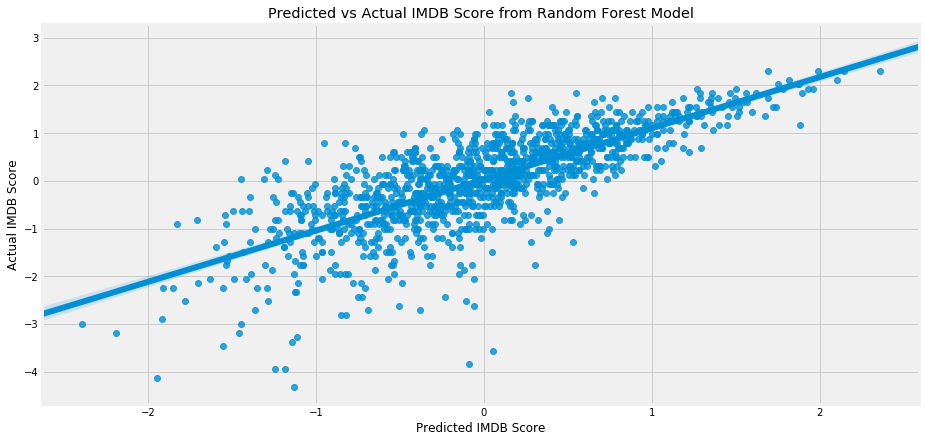

In [143]:
plt.figure(figsize=(14,7))
plt.title("Predicted vs Actual IMDB Score from Random Forest Model")
sns.regplot(y_pred, y_test)
plt.ylabel("Actual IMDB Score")
plt.xlabel("Predicted IMDB Score");

In [191]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), regr.feature_importances_), X_test.columns), 
             reverse=True))

Features sorted by their score:
[(0.3283, 'num_voted_users'), (0.1073, 'duration'), (0.1041, 'budget'), (0.0695, 'num_user_for_reviews'), (0.0547, 'gross'), (0.0458, 'num_critic_for_reviews'), (0.0372, 'title_year'), (0.0351, 'actor_3_facebook_likes'), (0.0316, 'actor_2_facebook_likes'), (0.0296, 'director_facebook_likes'), (0.0283, 'movie_facebook_likes'), (0.0243, 'cast_total_facebook_likes'), (0.0211, 'actor_1_facebook_likes'), (0.0144, 'facenumber_in_poster'), (0.0115, 'genre_Action'), (0.0091, 'rating_PG13'), (0.0088, 'genre_Horror'), (0.0056, 'genre_Comedy'), (0.0056, 'aspect_ratio'), (0.0048, 'genre_Drama'), (0.0042, 'rating_R'), (0.0041, 'genre_Biography'), (0.0038, 'rating_PG'), (0.0025, 'genre_Documentary'), (0.0021, 'genre_Adventure'), (0.0019, 'rating_G'), (0.0017, 'genre_Mystery'), (0.0012, 'genre_Crime'), (0.0007, 'genre_Animation'), (0.0004, 'rating_NR'), (0.0003, 'genre_SciFi'), (0.0002, 'genre_Fantasy'), (0.0, 'genre_Western'), (0.0, 'genre_Thriller'), (0.0, 'genre_Rom

This visualization shows how accurate we are. This shows that the prediction is not perfect but moderatly accurate.

# Regression section findings:

- Random Forest Regression module appears to be the best and most accurate module out of the others attempted as it had the highest r-squared of 0.57.
- Top three important factors are: 1-Number of Voted Users  2-Duration  3-Budget
- To note: Dummy variables were not included for "Country" and "Language" as that would have drastically increased the number of features of the dataset.

# Classification

- Logistic Regression classifier

- Neural Network Classifier

- Random Forest Classifier 

- KNN classification model ( It will be evaluated with 10 fold cross validation)

- Sigmoid SVC Classifcation Model

- Linear SVC Classifcation Model

In [144]:
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [145]:
df = pd.read_csv('CleanedFinalData.csv')
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_G,rating_NR,rating_PG,rating_PG13,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_SciFi,genre_Thriller,genre_Western
0,723.000,178.000,0.000,855.000,1000.000,760505847.000,886204,4834,0.000,3054.000,237000000.000,2009.000,936.000,7.900,1.780,33000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,302.000,169.000,563.000,1000.000,40000.000,309404152.000,471220,48350,0.000,1238.000,300000000.000,2007.000,5000.000,7.100,2.350,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,602.000,148.000,0.000,161.000,11000.000,200074175.000,275868,11700,1.000,994.000,245000000.000,2015.000,393.000,6.800,2.350,85000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,813.000,164.000,22000.000,23000.000,27000.000,448130642.000,1144337,106759,0.000,2701.000,250000000.000,2012.000,23000.000,8.500,2.350,164000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,462.000,132.000,475.000,530.000,640.000,73058679.000,212204,1873,1.000,738.000,263700000.000,2012.000,632.000,6.600,2.350,24000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [146]:
def quality(x):
    if x < 4:
        return 0
    elif x >=4 and x <6:
        return 1
    elif x >=6 and x <8:
        return 2
    else:
        return 3



df['quality'] = df['imdb_score'].apply(quality)
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_G,rating_NR,rating_PG,rating_PG13,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_SciFi,genre_Thriller,genre_Western,quality
0,723.000,178.000,0.000,855.000,1000.000,760505847.000,886204,4834,0.000,3054.000,237000000.000,2009.000,936.000,7.900,1.780,33000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,302.000,169.000,563.000,1000.000,40000.000,309404152.000,471220,48350,0.000,1238.000,300000000.000,2007.000,5000.000,7.100,2.350,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,602.000,148.000,0.000,161.000,11000.000,200074175.000,275868,11700,1.000,994.000,245000000.000,2015.000,393.000,6.800,2.350,85000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,813.000,164.000,22000.000,23000.000,27000.000,448130642.000,1144337,106759,0.000,2701.000,250000000.000,2012.000,23000.000,8.500,2.350,164000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,462.000,132.000,475.000,530.000,640.000,73058679.000,212204,1873,1.000,738.000,263700000.000,2012.000,632.000,6.600,2.350,24000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


## Logistic Regression Classifier

In [147]:
X = df.drop(['imdb_score','quality'], axis=1).copy()
y = df['quality'].copy()

X = (X-X.mean()) / (X.std())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,rating_G,rating_NR,rating_PG,rating_PG13,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_SciFi,genre_Thriller,genre_Western
0,4.509,2.992,-0.260,0.052,-0.431,10.130,5.177,-0.344,-0.672,6.660,0.857,0.601,-0.233,-0.948,1.112,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
1,1.110,2.596,-0.074,0.129,2.098,3.684,2.432,1.947,-0.672,2.219,1.138,0.400,0.669,0.680,-0.431,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
2,3.532,1.671,-0.260,-0.319,0.217,2.122,1.140,0.018,-0.185,1.623,0.892,1.204,-0.354,0.680,3.543,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
3,5.236,2.376,6.995,11.875,1.255,5.667,6.885,5.022,-0.672,5.797,0.915,0.902,4.667,0.680,7.235,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
4,2.402,0.967,-0.103,-0.122,-0.454,0.307,0.718,-0.500,-0.185,0.997,0.976,0.902,-0.301,0.680,0.691,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [153]:
lr = LogisticRegression(solver='lbfgs',multi_class='auto', max_iter=10000)
lr.fit(X_train,y_train)

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")

0.7568843430369787
--------------------------------------------------------
[[  0  16  11   0]
 [  0 154 172   0]
 [  0  76 763   7]
 [  0   0  27  45]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.63      0.47      0.54       326
           2       0.78      0.90      0.84       846
           3       0.87      0.62      0.73        72

    accuracy                           0.76      1271
   macro avg       0.57      0.50      0.53      1271
weighted avg       0.73      0.76      0.74      1271

--------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [154]:
scores = cross_val_score(lr, X_test, y_test, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.75193798 0.74418605 0.7265625  0.6953125  0.671875   0.78125
 0.78571429 0.752      0.76       0.832     ]
0.7500838316722038


# Neural Network Classifier

In [155]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=10000)
mlp.fit(X_train,y_train)
mlp_y = mlp.predict(X_test)

print(metrics.accuracy_score(y_test, mlp_y))
print("---------------------------------------------")
print(metrics.confusion_matrix(y_test, mlp_y))
print("---------------------------------------------")
print(metrics.classification_report(y_test, mlp_y))

0.7450826121164438
---------------------------------------------
[[  4  14   9   0]
 [ 13 194 117   2]
 [  4 123 703  16]
 [  0   0  26  46]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.19      0.15      0.17        27
           1       0.59      0.60      0.59       326
           2       0.82      0.83      0.83       846
           3       0.72      0.64      0.68        72

    accuracy                           0.75      1271
   macro avg       0.58      0.55      0.57      1271
weighted avg       0.74      0.75      0.74      1271



In [182]:
scores = cross_val_score(mlp, X_test, y_test, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.6744186  0.72093023 0.8046875  0.6875     0.71875    0.7109375
 0.68253968 0.664      0.656      0.712     ]
0.7031763519748984


# Random Forest Classifier

In [157]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

print(metrics.accuracy_score(y_test, clf.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")

0.7490165224232888
--------------------------------------------------------
[[  2  11  14   0]
 [  0 139 187   0]
 [  0  52 782  12]
 [  0   0  43  29]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.07      0.14        27
           1       0.69      0.43      0.53       326
           2       0.76      0.92      0.84       846
           3       0.71      0.40      0.51        72

    accuracy                           0.75      1271
   macro avg       0.79      0.46      0.50      1271
weighted avg       0.75      0.75      0.72      1271

--------------------------------------------------------


In [183]:
scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.74418605 0.76744186 0.796875   0.71875    0.734375   0.703125
 0.74603175 0.672      0.76       0.792     ]
0.743478465300849


# KNN Classifcation Model

In [158]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn = knn.fit(X_train, y_train)


print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

0.6947285601888277
--------------------------------------------------------
[[  0  11  16   0]
 [  6 154 166   0]
 [  2 127 713   4]
 [  0   0  56  16]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.53      0.47      0.50       326
           2       0.75      0.84      0.79       846
           3       0.80      0.22      0.35        72

    accuracy                           0.69      1271
   macro avg       0.52      0.38      0.41      1271
weighted avg       0.68      0.69      0.68      1271

--------------------------------------------------------


# Evaluating the model with 10-fold cross validation

In [159]:
scores = cross_val_score(knn, X_test, y_test, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.66666667 0.63565891 0.71875    0.6328125  0.6796875  0.7421875
 0.66666667 0.664      0.672      0.736     ]
0.6814429748062014


# Sigmoid SVC Classifcation Model

In [184]:
from sklearn import svm

svc = svm.SVC(kernel='sigmoid')
svc.fit(X_train,y_train)

print(metrics.accuracy_score(y_test, svc.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, svc.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, svc.predict(X_test)))
print("--------------------------------------------------------")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6789929189614476
--------------------------------------------------------
[[  0  13  14   0]
 [  1 121 204   0]
 [  2 114 712  18]
 [  0   5  37  30]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.48      0.37      0.42       326
           2       0.74      0.84      0.79       846
           3       0.62      0.42      0.50        72

    accuracy                           0.68      1271
   macro avg       0.46      0.41      0.43      1271
weighted avg       0.65      0.68      0.66      1271

--------------------------------------------------------


In [185]:
scores = cross_val_score(svc, X_test, y_test, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

[0.72868217 0.71317829 0.703125   0.6796875  0.6796875  0.6953125
 0.65079365 0.704      0.664      0.72      ]
0.693846661590993


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Linear SVC Classifcation Model

In [186]:
from sklearn import svm

svc = svm.SVC(kernel='linear')
svc.fit(X_train,y_train)

print(metrics.accuracy_score(y_test, svc.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, svc.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, svc.predict(X_test)))
print("--------------------------------------------------------")

0.7490165224232888
--------------------------------------------------------
[[  0  15  12   0]
 [  0 149 177   0]
 [  0  75 763   8]
 [  0   0  32  40]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.62      0.46      0.53       326
           2       0.78      0.90      0.83       846
           3       0.83      0.56      0.67        72

    accuracy                           0.75      1271
   macro avg       0.56      0.48      0.51      1271
weighted avg       0.72      0.75      0.73      1271

--------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [187]:
scores = cross_val_score(svc, X_test, y_test, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.75193798 0.7751938  0.6875     0.6796875  0.6640625  0.78125
 0.77777778 0.752      0.752      0.84      ]
0.7461409560723514


# Classification section finding:

- Best observed model is the Logistic Regression classifier (0.75). This was the highest out of the others attempted.
- All attempted classifiers reflected issues in properly classifying the movies into thier categories on both ends. In other words, if a movie was very good or bad, this problem occured. 
- An educated guess to the above mentioned problem is resulting from the lack of available data. (limited movies that fell in one of the two extreme spectrumes)

# Clustering

- K-Means Clustering

- Initial visualization of clusters

- Elbow & Silhouette method to determine optimal K value

- Cluster analysis + Visualization ( With movies placed in two clusters )

- Agglomerative Clustering + visualization

## K-Means Clustering

In [162]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3851 entries, 0 to 3850
Data columns (total 39 columns):
num_critic_for_reviews       3851 non-null float64
duration                     3851 non-null float64
director_facebook_likes      3851 non-null float64
actor_3_facebook_likes       3851 non-null float64
actor_1_facebook_likes       3851 non-null float64
gross                        3851 non-null float64
num_voted_users              3851 non-null int64
cast_total_facebook_likes    3851 non-null int64
facenumber_in_poster         3851 non-null float64
num_user_for_reviews         3851 non-null float64
budget                       3851 non-null float64
title_year                   3851 non-null float64
actor_2_facebook_likes       3851 non-null float64
imdb_score                   3851 non-null float64
aspect_ratio                 3851 non-null float64
movie_facebook_likes         3851 non-null int64
rating_G                     3851 non-null int64
rating_NR                    3851 

In [164]:
df_norm = df.copy()

df_norm.drop('quality',axis=1,inplace=True)

df_norm = ((df_norm - df_norm.mean()) / (df_norm.std()))
df_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_G,rating_NR,rating_PG,rating_PG13,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_SciFi,genre_Thriller,genre_Western
0,4.509,2.992,-0.260,0.052,-0.431,10.130,5.177,-0.344,-0.672,6.660,0.857,0.601,-0.233,1.359,-0.948,1.112,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
1,1.110,2.596,-0.074,0.129,2.098,3.684,2.432,1.947,-0.672,2.219,1.138,0.400,0.669,0.602,0.680,-0.431,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
2,3.532,1.671,-0.260,-0.319,0.217,2.122,1.140,0.018,-0.185,1.623,0.892,1.204,-0.354,0.318,0.680,3.543,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
3,5.236,2.376,6.995,11.875,1.255,5.667,6.885,5.022,-0.672,5.797,0.915,0.902,4.667,1.927,0.680,7.235,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023
4,2.402,0.967,-0.103,-0.122,-0.454,0.307,0.718,-0.500,-0.185,0.997,0.976,0.902,-0.301,0.128,0.680,0.691,-0.155,-0.179,-0.419,1.381,-0.908,1.729,-0.328,-0.109,-0.238,-0.605,-0.268,-0.094,-0.468,-0.028,-0.098,-0.212,-0.023,-0.078,-0.016,-0.046,-0.028,-0.023


In [165]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [166]:
k_means.cluster_centers_

array([[-3.64795710e-01, -2.74676689e-01, -4.58887076e-02,
        -1.00259262e-01, -8.41070125e-02,  1.91497601e-01,
        -2.45201456e-01, -1.10556017e-01, -6.01256097e-02,
        -3.13118203e-01,  1.42004627e-02, -1.43027451e-01,
        -1.33557118e-01, -2.27638460e-01, -1.42883431e-01,
        -2.06107781e-01, -1.54672531e-01, -1.79317058e-01,
         2.38661095e+00, -7.24160566e-01, -9.08242381e-01,
        -8.25310850e-02,  6.66292736e-01,  3.22025950e-01,
        -2.15326193e-04, -2.38730242e-02, -2.68488274e-01,
         8.37741957e-02, -2.02160300e-01,  1.04813712e-01,
        -4.15366659e-02, -1.93260875e-01, -2.27921161e-02,
        -7.75035435e-02, -1.61143666e-02, -4.95270548e-03,
        -2.79181542e-02, -2.27921161e-02],
       [ 1.70533518e+00,  9.07711054e-01,  7.59153322e-01,
         1.28984717e+00,  8.12188154e-01,  1.62043748e+00,
         2.07810099e+00,  1.16362287e+00,  1.41095088e-02,
         1.76334111e+00,  2.13059858e-01,  3.82473966e-01,
         1.28

In [167]:
df['cluster'] = k_means.labels_
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_G,rating_NR,rating_PG,rating_PG13,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_SciFi,genre_Thriller,genre_Western,quality,cluster
0,723.000,178.000,0.000,855.000,1000.000,760505847.000,886204,4834,0.000,3054.000,237000000.000,2009.000,936.000,7.900,1.780,33000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
1,302.000,169.000,563.000,1000.000,40000.000,309404152.000,471220,48350,0.000,1238.000,300000000.000,2007.000,5000.000,7.100,2.350,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
2,602.000,148.000,0.000,161.000,11000.000,200074175.000,275868,11700,1.000,994.000,245000000.000,2015.000,393.000,6.800,2.350,85000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
3,813.000,164.000,22000.000,23000.000,27000.000,448130642.000,1144337,106759,0.000,2701.000,250000000.000,2012.000,23000.000,8.500,2.350,164000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
4,462.000,132.000,475.000,530.000,640.000,73058679.000,212204,1873,1.000,738.000,263700000.000,2012.000,632.000,6.600,2.350,24000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3


In [168]:
df.groupby(['cluster']).mean().T

cluster,0,1,2,3
num_critic_for_reviews,119.385,375.745,143.589,149.128
duration,103.794,130.653,108.458,108.651
director_facebook_likes,649.670,3090.859,534.725,493.281
actor_3_facebook_likes,570.272,3174.029,428.000,567.594
actor_1_facebook_likes,6349.133,20173.562,6007.759,6697.439
gross,64950564.446,164953287.435,26809929.550,46646183.669
num_voted_users,66530.639,417722.737,68546.087,72430.126
cast_total_facebook_likes,9262.650,33466.239,8442.878,9643.747
facenumber_in_poster,1.257,1.409,1.299,1.558
num_user_for_reviews,202.263,1051.477,255.330,270.513


# Visualization

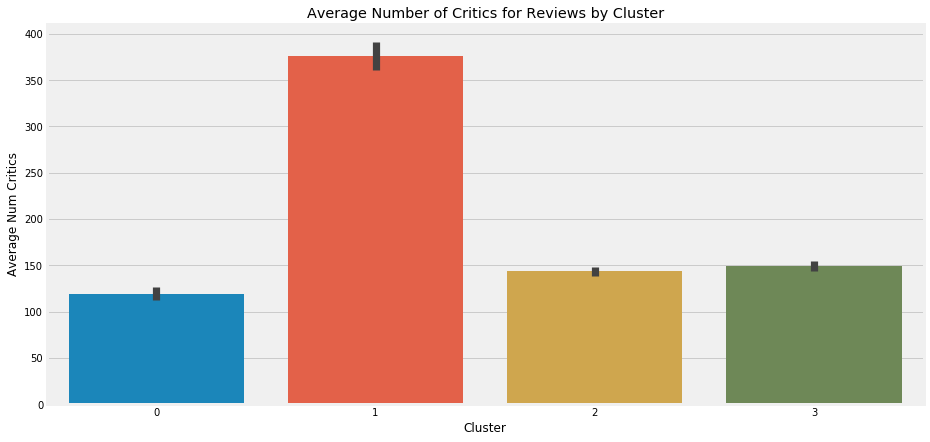

In [169]:
plt.figure(figsize=(14,7))
plt.title('Average Number of Critics for Reviews by Cluster')
sns.barplot(x="cluster", y="num_critic_for_reviews", data=df)
plt.ylabel('Average Num Critics')
plt.xlabel('Cluster');

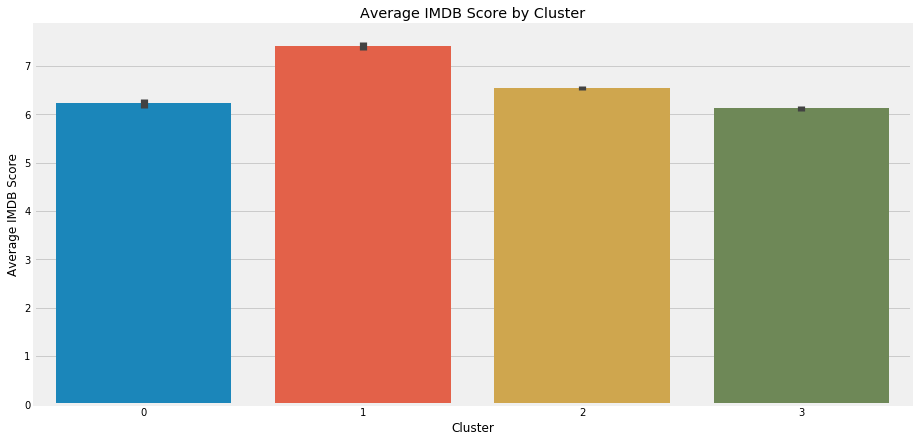

In [170]:
plt.figure(figsize=(14,7))
plt.title('Average IMDB Score by Cluster')
sns.barplot(x="cluster", y="imdb_score", data=df)
plt.ylabel('Average IMDB Score')
plt.xlabel('Cluster');

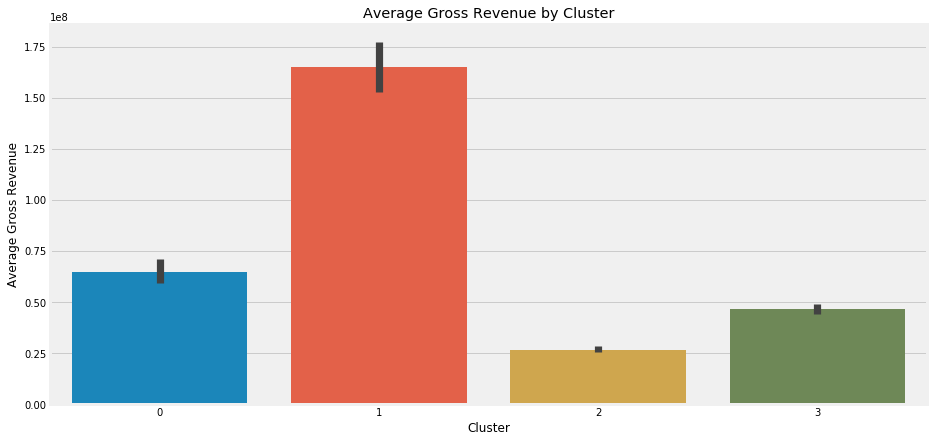

In [171]:
plt.figure(figsize=(14,7))
plt.title('Average Gross Revenue by Cluster')
sns.barplot(x="cluster", y="gross", data=df)
plt.ylabel('Average Gross Revenue')
plt.xlabel('Cluster');

# Elbow Method

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

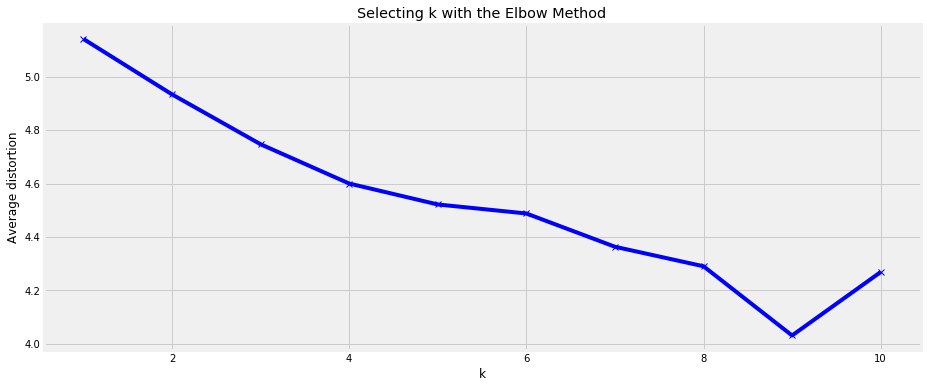

In [172]:
from scipy.spatial.distance import cdist 

K = range(1,11) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.figure(figsize=(14,6))    
plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

# Silhouette Method 

In [173]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

tests = [2, 3, 4, 5, 6, 7, 8]

for k in tests:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_norm)
    labels = kmeans_model.labels_
    print(metrics.silhouette_score(df_norm, labels, metric='euclidean'))

0.24304077658026527
0.07583304155188429
0.0971284396066806
0.08959371586161737
0.10084497703781056
0.10946285331063663
0.12905911738300027


## Optimal k value = two clusters


# Cluster analysis using optimal K value (2)

In [174]:
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [175]:
df['cluster'] = k_means.labels_
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_G,rating_NR,rating_PG,rating_PG13,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_SciFi,genre_Thriller,genre_Western,quality,cluster
0,723.000,178.000,0.000,855.000,1000.000,760505847.000,886204,4834,0.000,3054.000,237000000.000,2009.000,936.000,7.900,1.780,33000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
1,302.000,169.000,563.000,1000.000,40000.000,309404152.000,471220,48350,0.000,1238.000,300000000.000,2007.000,5000.000,7.100,2.350,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
2,602.000,148.000,0.000,161.000,11000.000,200074175.000,275868,11700,1.000,994.000,245000000.000,2015.000,393.000,6.800,2.350,85000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
3,813.000,164.000,22000.000,23000.000,27000.000,448130642.000,1144337,106759,0.000,2701.000,250000000.000,2012.000,23000.000,8.500,2.350,164000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
4,462.000,132.000,475.000,530.000,640.000,73058679.000,212204,1873,1.000,738.000,263700000.000,2012.000,632.000,6.600,2.350,24000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1


In [176]:
df.groupby(['cluster']).mean().T

cluster,0,1
num_critic_for_reviews,130.847,338.248
duration,106.871,126.327
director_facebook_likes,431.589,2629.200
actor_3_facebook_likes,441.056,2391.211
actor_1_facebook_likes,5747.839,17427.307
gross,34595568.999,138887876.812
num_voted_users,58166.813,337632.883
cast_total_facebook_likes,8167.561,27823.343
facenumber_in_poster,1.386,1.350
num_user_for_reviews,224.203,877.008


# Visualization

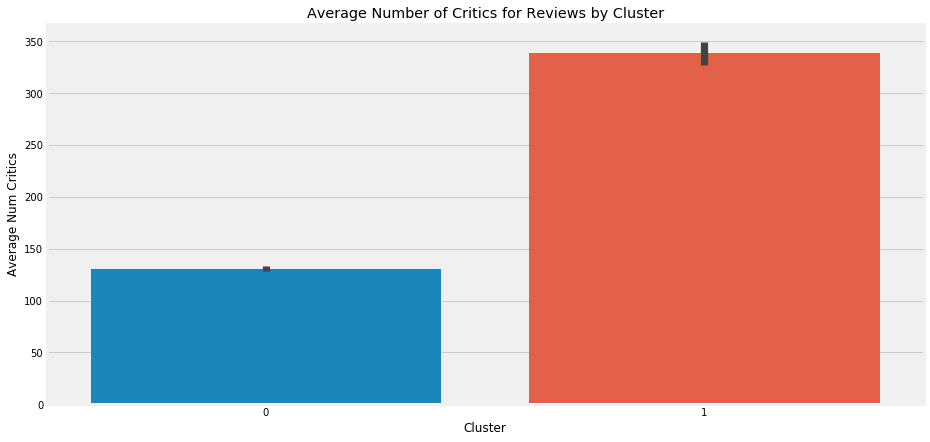

In [177]:
plt.figure(figsize=(14,7))
plt.title('Average Number of Critics for Reviews by Cluster')
sns.barplot(x="cluster", y="num_critic_for_reviews", data=df)
plt.ylabel('Average Num Critics')
plt.xlabel('Cluster');

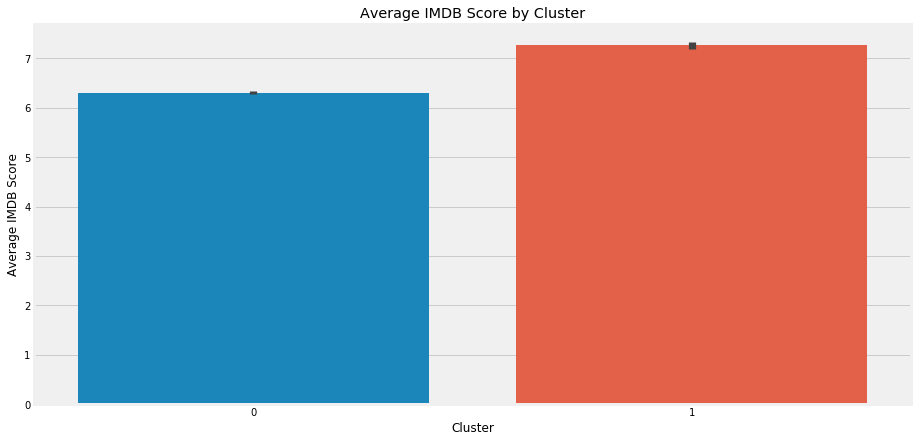

In [178]:
plt.figure(figsize=(14,7))
plt.title('Average IMDB Score by Cluster')
sns.barplot(x="cluster", y="imdb_score", data=df)
plt.ylabel('Average IMDB Score')
plt.xlabel('Cluster');

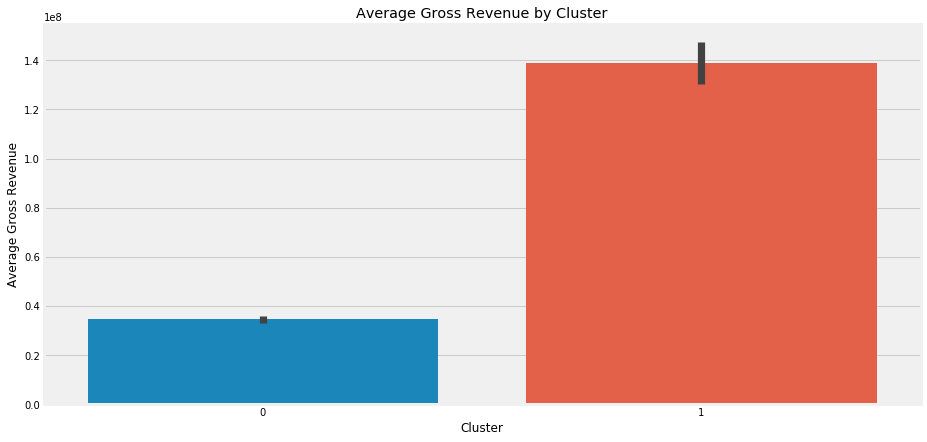

In [179]:
plt.figure(figsize=(14,7))
plt.title('Average Gross Revenue by Cluster')
sns.barplot(x="cluster", y="gross", data=df)
plt.ylabel('Average Gross Revenue')
plt.xlabel('Cluster');

# Agglomerative Clustering

In [180]:
np.random.seed(1) 

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

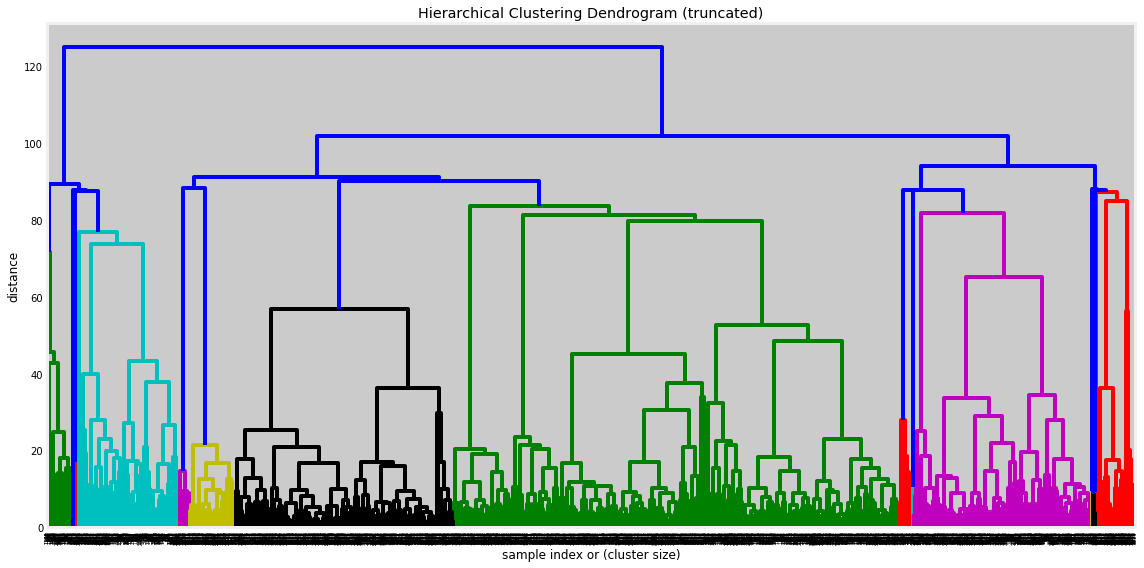

In [181]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')


linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  
           #p=5,  
          
           #leaf_rotation=90.,
           #leaf_font_size=12.,
           #show_contracted=True,  
           orientation="top")
plt.tight_layout() 

### Clustering 
- By utalizing the elbow and silhouette methods, the optimal k value for the clusters was shown to be two.
- Firstly, movies which earned less gross revenue was grouped in cluster 0, while the movies which earned more were grouped in cluster 1. 
- Secondly, movies which were reviewed by critics less were grouped in cluster 0, while movies which recieved more critique reviews were placed in cluster 1.
- To summarize, movies in cluster 0 earned generated less money and got less reviews hence its movies were viewed as being subpar of movies in cluster 1 which generated more money and recieved more critical reviews.

# Project Part Two Finding Summary

### Regression
- Best observed model was the random forest regression model as it had the highest r-squared of 0.57.
- Top three important factors are: 1-Number of Voted Users  2-Duration  3-Budget
- Dummy variables were not included for "Country" and "Language" as that would have drastically increased the number of features of the dataset.

### Classification
- Best observed model is the Logistic Regression classifier (0.75). This was the highest out of the others attempted.
- All attempted classifiers reflected issues in properly classifying the movies into thier categories on both ends. In other words, if a movie was very good or bad, this problem occured. 
- An educated guess to the above mentioned problem is resulting from the lack of available data. (limited movies that fell in one of the two extreme spectrumes)

### Clustering 
- By utalizing the elbow and silhouette methods, the optimal k value for the clusters was shown to be two.
- Firstly, movies which earned less gross revenue was grouped in cluster 0, while the movies which earned more were grouped in cluster 1. 
- Secondly, movies which were reviewed by critics less were grouped in cluster 0, while movies which recieved more critique reviews were placed in cluster 1.
- The data reflects that movies in cluster 1 had a higher IMDB score on average than movies in cluster 0.
- To summarize, movies in cluster 0 earned less money and got less reviews hence its movies were viewed as being subpar of movies in cluster 1 which generated more money and recieved more critical reviews. 



# Suggestions & Comments

- Both while part one & two had different findings in regards to the most important factors related to the IMDB scores, they both concluded that the "number of users who voted" is the most important. As such, this factor should be focused on as it is the best indicator of a movie's success and its IMDB score.



- As the number of user who voted is established to be the most important factor, it is pivotal to mention that the top three variables which are connected to this factor are: 1- Num_users_for_reviews (r value of 0.8)  2- Gross Revenue (r value of 0.64) 3- Num_critic_for_reviews (r value of 0.62). (this was reflected in the correlation analysis done before part 1 findings summary).



- While the random forest regression proved to be the most accurate out of the ones tried in this project, its r-squared value is 0.57, which is not that great. As such, further research is needed to find a more accurate model which is still needs to be identified.

# Visual Slide Presentation 

In [4]:
from IPython.display import Video

Video("Zoom_0.MP4")

## Youtube Link for the Video in Case the one embeded above does not work on Github

### To note: If you get "An error occurred. Please try again later", simply access the video directly using the Youtube link below.

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://youtu.be/X_GrYY5cL2c') # If the video does not work here copy/paste this youtube link to watch it directly on Youtube

# The End 

# B. Alkassab "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."